In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df1=pd.read_csv("/kaggle/input/bank-dataset-for-service/bank-full.csv",sep=';')
df2=pd.read_csv("/kaggle/input/bank-dataset-for-service/bank.csv",sep=';')

/kaggle/input/bank-dataset-for-service/bank.csv
/kaggle/input/bank-dataset-for-service/bank-names.txt
/kaggle/input/bank-dataset-for-service/bank-full.csv


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoders = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df1.drop(columns=['y'])
y = df1['y']




In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the classifier on test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8872014155116484

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.56      0.21      0.30      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



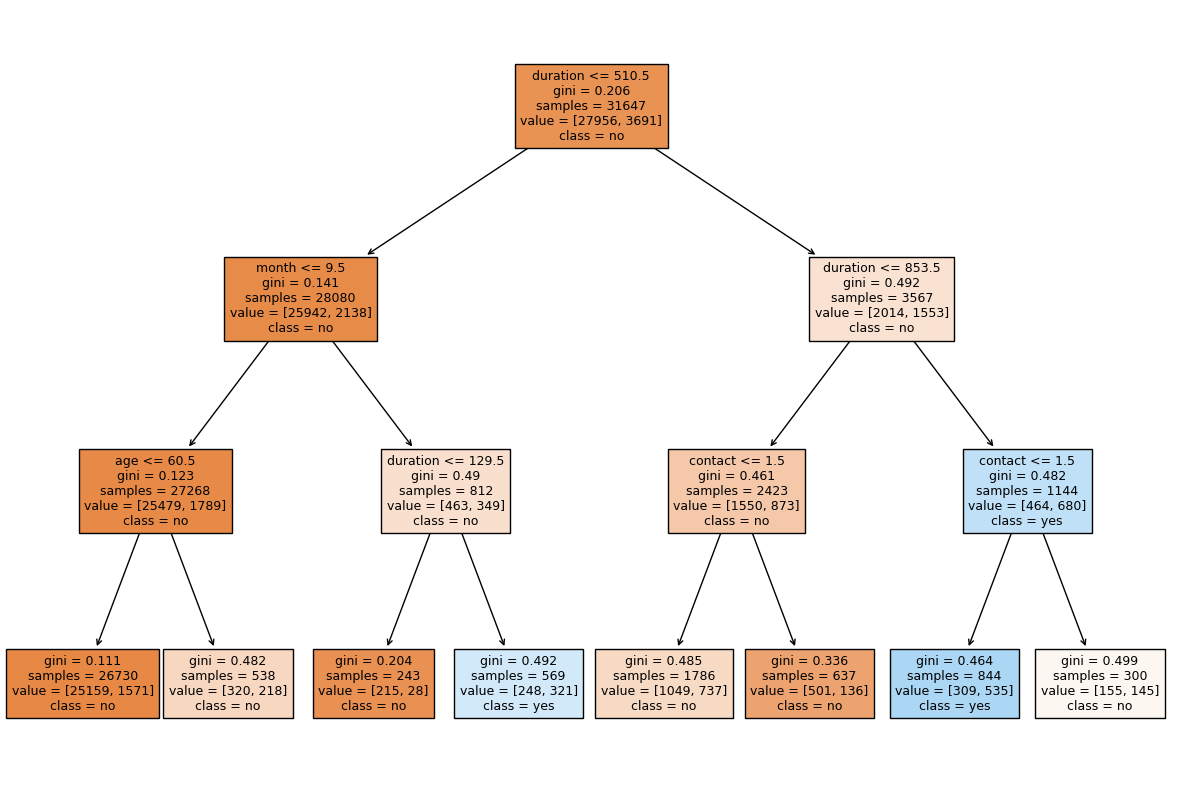

In [21]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True,fontsize=9)
plt.show()



In [8]:
# Print the text representation of the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- pdays <= 8.50
|   |   |   |   |--- duration <= 313.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  313.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- pdays >  8.50
|   |   |   |   |--- poutcome <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- poutcome >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- age >  60.50
|   |   |   |--- duration <= 225.00
|   |   |   |   |--- duration <= 126.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  126.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  225.00
|   |   |   |   |--- poutcome <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- poutcome >  1.50
|   |   |   |   |   |--- class: 1
|   |--- month >  9.50
|   |   |--- duration <= 129.50
|   |   |   |--- duration <= 79.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  79.50
|   |